# Use case

For our interview, I’m sending you a sample data set and some challenges.

 
## Data
* The data in train_data.csv is related to cancer diagnoses of different types.
* Each case includes information on the properties (radius, texture and perimeter) of the three most characteristic cell nuclei.
* Moreover, the age of the person, the date of the diagnose and treatment start, as well as the cancer type is available.
* The same information is also present in the test_data.csv, only the cancer type is missing.

 

For our interview please look into the data and…

## Objectives

1    Perform an exploratory data analysis
* What are abnormalities in the data?
* Are there any interesting, perhaps unexpected correlations to be found?

2    Create a model for predicting the cancer_type
* Select an appropriate model and keep its complexity reasonable (number of used features, etc.)

I would like you to send me a submission.csv for the cases in test_data.csv at least on hour before the interview that includes the prediction of the cancer_type of your model. The cases should be in the same order as in the test_data.csv and should only contain the label of the predicted cancer_type. See the sample_submission.csv for format clarification.

3    Build a regression model for predicting radius_2 based on perimeter_1
* the model should be able to quantify its prediction reliability, e.g. density estimates, etc. (please do not just use the outputted R^2 or confidence interval estimates of typical linear regression packages fitting results)
* prepare a visualization that illustrates possible prediction uncertainties

 

    

During the interview, I would like you to explain your course of action to me, for example by showing your workflow in a jupyter-notebook-like application using the Skype screen sharing.

This is totally up to you.


## Metric

What is radius and perimeter?
![](https://www.frontiersin.org/files/Articles/278283/fncel-11-00235-HTML/image_m/fncel-11-00235-g002.jpg)

# Imports

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# conventional way to import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
PATH = "/home/schreibf/projects/secret/data/"
#PATH = "/Users/fabsta/projects/datascience/secret/data/"

In [5]:
!ls {PATH}

sample_submission.csv  test_data.csv  train_data.csv


## The data
Look at the data


In [6]:
df_train = pd.read_csv(f'{PATH}train_data.csv', low_memory=False, 
                     parse_dates=["diagnose_date","treatment_date"], encoding = "ISO-8859-1")
df_test = pd.read_csv(f'{PATH}test_data.csv', low_memory=False, 
                     parse_dates=["diagnose_date", "treatment_date"])
df_submission = pd.read_csv(f'{PATH}sample_submission.csv')

In [7]:
df_train.T.head(13)

,0,1,2,3,4,5,6,7,8,9,...,388,389,390,391,392,393,394,395,396,397
radius_0,19.8584,14.1821,25.3803,11.836,14.8756,11.0164,19.3794,14.2922,13.1199,15.1006,...,19.1277,14.0596,14.8482,21.0814,21.4527,9.24874,19.915,11.9018,13.0172,10.6222
texture_0,27.2044,15.7547,21.2916,17.8207,17.5342,24.0134,21.8503,28.4308,14.6191,7.44,...,27.5533,24.1581,20.4647,20.4294,24.2706,22.0382,33.9648,14.8994,22.8183,26.5855
perimeter_0,136.324,80.917,152.281,72.1785,98.5458,72.3736,107.734,81.2936,88.2935,90.0244,...,122.537,92.6986,117.536,114.247,165.24,80.8514,94.2514,75.2712,76.9718,67.6937
radius_1,22.6833,14.0438,23.8522,11.2603,14.3807,12.0742,16.7487,15.0425,13.0932,14.6459,...,21.5547,12.6095,15.4051,17.5057,18.3155,NaN,22.3553,11.9152,10.7321,11.2088
texture_1,32.8026,30.0947,46.2379,44.8052,26.1904,41.7143,22.2656,36.4805,12.2997,11.4253,...,30.7749,41.8349,22.2278,49.2295,27.4641,8.56083,41.0647,27.4492,16.7659,24.4785
perimeter_1,119.524,94.9111,NaN,NaN,89.7125,71.4403,NaN,78.6686,81.908,95.2426,...,147.451,82.3945,106.933,161.197,112.425,72.581,NaN,83.6733,70.391,NaN
radius_2,21.4771,15.0123,28.5633,12.0827,12.9307,11.309,18.0893,14.5842,13.9637,13.5708,...,23.8215,11.5346,16.3416,18.301,18.7518,12.2817,20.4715,11.7472,12.0421,9.79492
texture_2,27.3071,17.8551,21.0972,16.4992,19.8567,NaN,20.9626,24.0556,16.9083,11.9349,...,19.7254,20.2144,19.9453,22.0809,17.9595,18.0663,36.9011,22.8521,22.8896,15.2867
perimeter_2,82.3669,103.078,143.368,65.9204,108.381,73.6376,184.391,126.014,56.235,139.979,...,165.578,169.41,176.03,120.032,69.3444,97.4869,48.3005,134.297,190.688,212.856
age,44,59,37,51,21,27,51,40,43,50,...,38,61,36,27,18,21,63,34,32,46


In [8]:
# Replace 'xx'
#df_train['texture_2'].replace({'xx': np.nan}, inplace = True)

In [9]:
print(len(df_train))
print(len(df_test))

398
171


In [10]:
df_train.dtypes

radius_0                 float64
texture_0                float64
perimeter_0              float64
radius_1                 float64
texture_1                float64
perimeter_1              float64
radius_2                 float64
texture_2                float64
perimeter_2              float64
age                        int64
treatment_date    datetime64[ns]
diagnose_date     datetime64[ns]
cancer_type                int64
dtype: object

## Missing data

### Missing training data

In [11]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
perimeter_1,134,0.336683
radius_1,55,0.138191
texture_2,16,0.040201
cancer_type,0,0.000000
diagnose_date,0,0.000000
treatment_date,0,0.000000
age,0,0.000000
perimeter_2,0,0.000000
radius_2,0,0.000000
texture_1,0,0.000000


In [12]:
df_train['radius_1'] = df_train['radius_1'].fillna(df_train['radius_1'].mean())
df_train['perimeter_1'] = df_train['perimeter_1'].fillna(df_train['perimeter_1'].mean())
df_train['texture_2'] = df_train['texture_2'].fillna(df_train['texture_2'].mean())

### Missing test data

In [13]:
#missing data
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
perimeter_1,66,0.385965
radius_1,25,0.146199
texture_2,12,0.070175
diagnose_date,0,0.000000
treatment_date,0,0.000000
age,0,0.000000
perimeter_2,0,0.000000
radius_2,0,0.000000
texture_1,0,0.000000
perimeter_0,0,0.000000


In [14]:
df_test['radius_1'] = df_test['radius_1'].fillna(df_test['radius_1'].mean())
df_test['perimeter_1'] = df_test['perimeter_1'].fillna(df_test['perimeter_1'].mean())
df_test['texture_2'] = df_test['texture_2'].fillna(df_test['texture_2'].mean())


# Part 1 - Exploratory data analysis

## Pairplot for all data

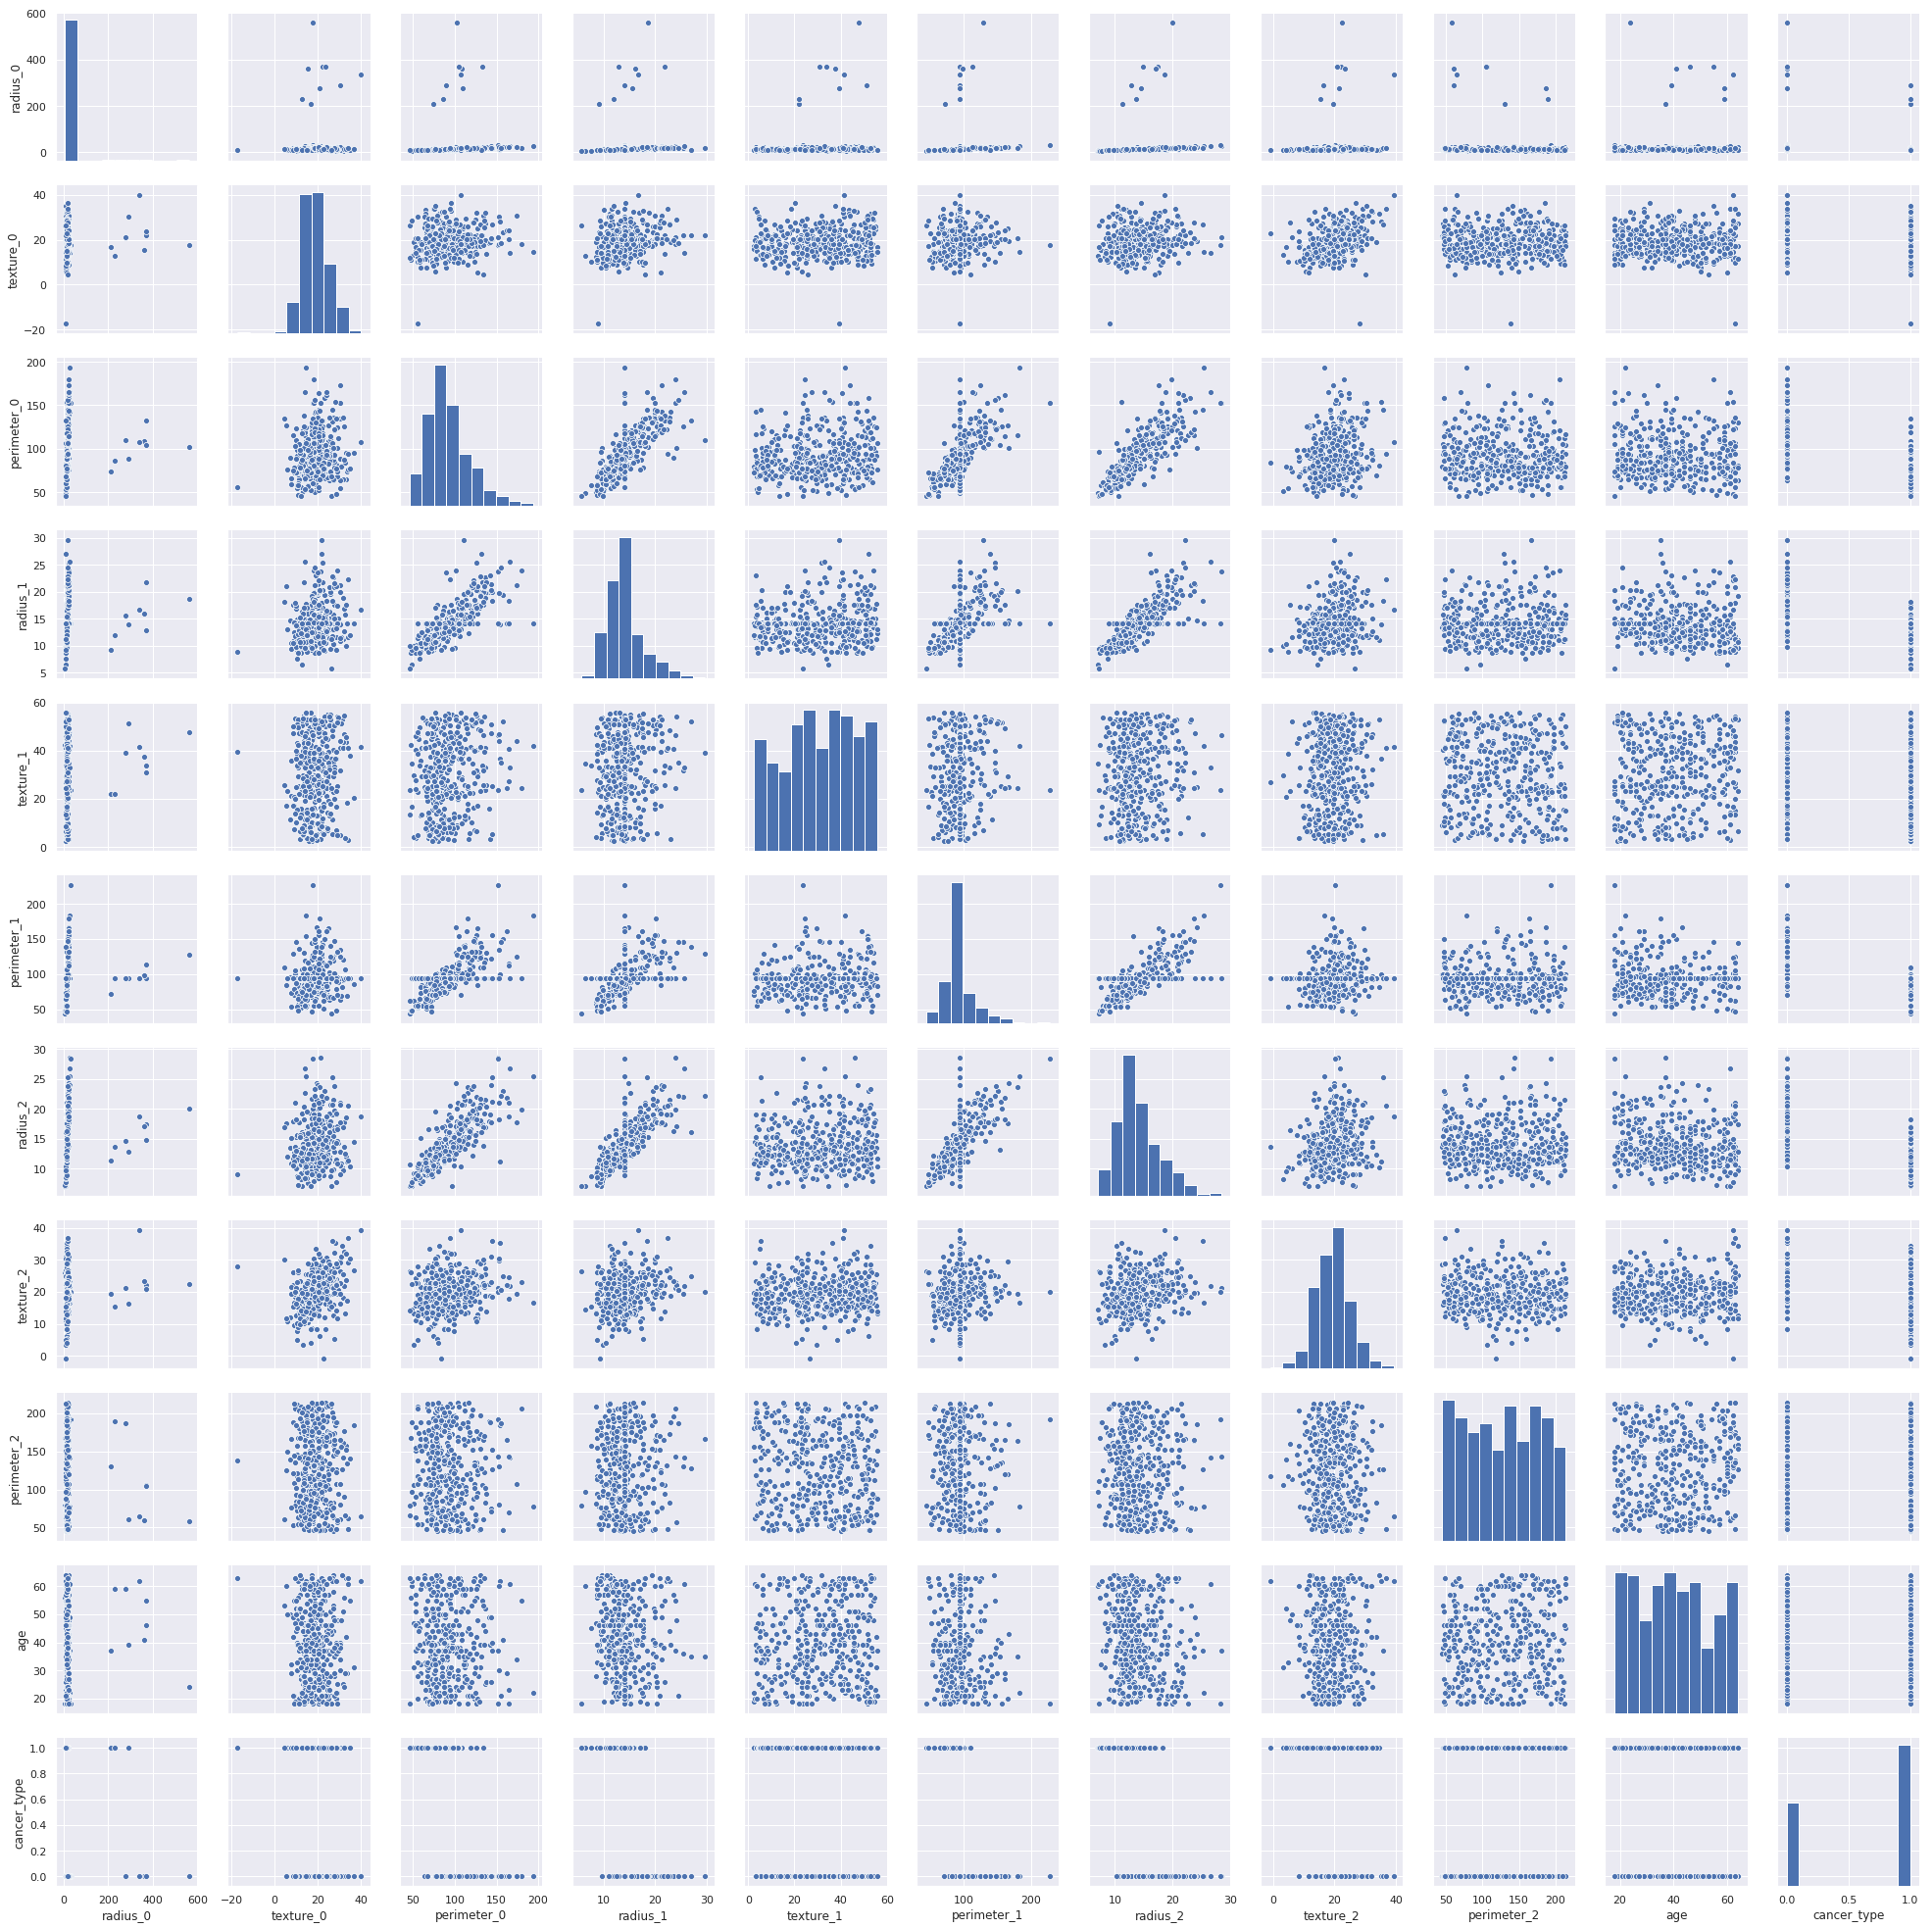

In [15]:
#scatterplot
sns.set()
cols = df_train.columns
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Single features in detail

### Target column (Cancer type)

In [16]:
df_train['cancer_type'].value_counts()

1    250
0    148
Name: cancer_type, dtype: int64

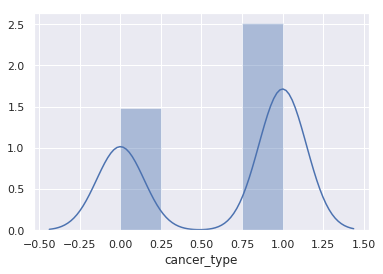

In [17]:
sns.distplot(df_train['cancer_type']);

Target variable is not unbalanced

### Texture

In [18]:
print(df_train['texture_0'].describe())
print(df_train['texture_1'].describe())
print(df_train['texture_2'].describe())


count    398.000000
mean      18.957554
std        6.243499
min      -17.243202
25%       14.581364
50%       18.238742
75%       22.494291
max       40.064462
Name: texture_0, dtype: float64
count    398.000000
mean      30.417222
std       15.027855
min        2.395868
25%       19.898062
50%       30.897762
75%       42.555657
max       55.820612
Name: texture_1, dtype: float64
count    398.000000
mean      19.459098
std        5.684066
min       -0.966998
25%       15.711594
50%       19.459098
75%       22.807407
max       39.331864
Name: texture_2, dtype: float64


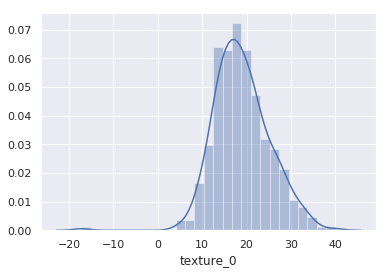

In [19]:
t = sns.distplot(df_train['texture_0'])

negative texture? 
Not sure what the allowed range of values is for texture, but negative values are suspicious

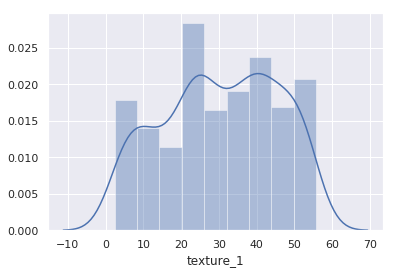

In [20]:
t = sns.distplot(df_train['texture_1'])

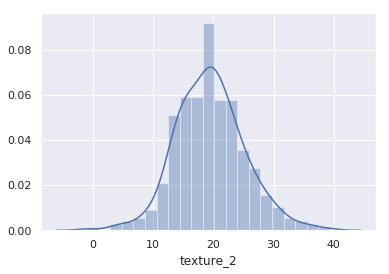

In [21]:
t = sns.distplot(df_train['texture_2'])

### Radius

In [23]:
print(df_train['radius_0'].describe())
print(df_train['radius_1'].describe())
print(df_train['radius_2'].describe())

count    398.000000
mean      21.303711
std       49.987646
min        6.401956
25%       11.693885
50%       13.468170
75%       16.323024
max      561.311068
Name: radius_0, dtype: float64
count    398.000000
mean      14.123575
std        3.508995
min        5.752395
25%       11.841313
50%       14.060150
75%       15.370723
max       29.645166
Name: radius_1, dtype: float64
count    398.000000
mean      14.134922
std        3.748146
min        7.079847
25%       11.573592
50%       13.333610
75%       16.093900
max       28.563252
Name: radius_2, dtype: float64


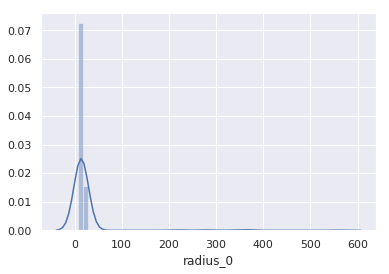

In [24]:
t = sns.distplot(df_train['radius_0'])

So, this is interesting. The 0th cell radius has some outliers. 
Given that the two other cell radi have a maximum of ~30, I would either
* talk to a subject matter expert 
* filter out the outliers

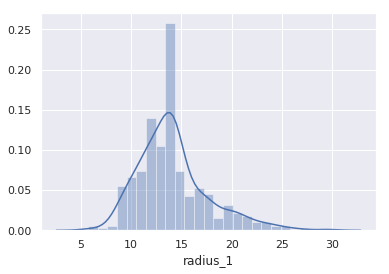

In [25]:
t = sns.distplot(df_train['radius_1'])

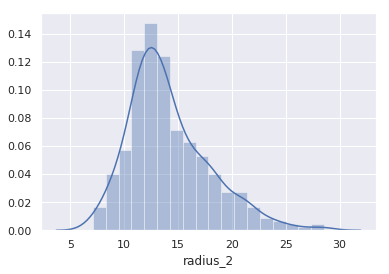

In [26]:
t = sns.distplot(df_train['radius_2'])

### Perimeter

In [27]:
print(df_train['perimeter_0'].describe())
print(df_train['perimeter_1'].describe())
print(df_train['perimeter_2'].describe())

count    398.000000
mean      92.128890
std       25.159787
min       45.612505
25%       74.975361
50%       87.376764
75%      104.876420
max      193.755763
Name: perimeter_0, dtype: float64
count    398.000000
mean      94.086379
std       22.231836
min       43.444930
25%       82.575868
50%       94.086379
75%       97.183260
max      227.162938
Name: perimeter_1, dtype: float64
count    398.000000
mean     127.222422
std       49.097558
min       44.918942
25%       84.123724
50%      129.992697
75%      169.538170
max      214.192377
Name: perimeter_2, dtype: float64


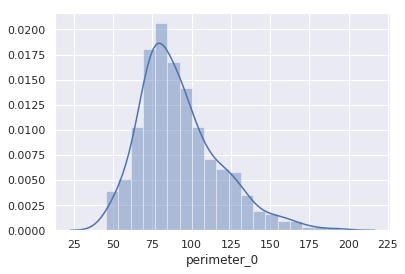

In [28]:
sns.distplot(df_train['perimeter_0']);

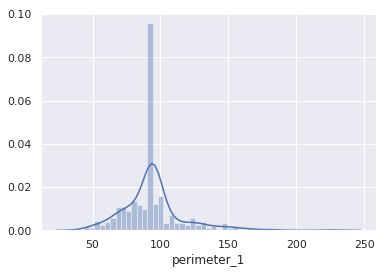

In [29]:
sns.distplot(df_train['perimeter_1']);

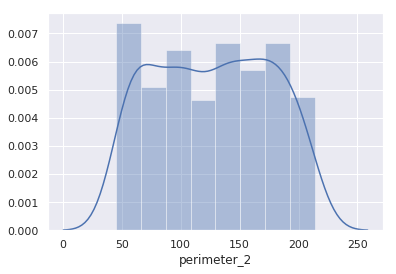

In [30]:
sns.distplot(df_train['perimeter_2']);

### Age

In [31]:
print(df_train['age'].describe())

count    398.000000
mean      39.876884
std       13.427196
min       18.000000
25%       28.000000
50%       39.000000
75%       50.000000
max       64.000000
Name: age, dtype: float64


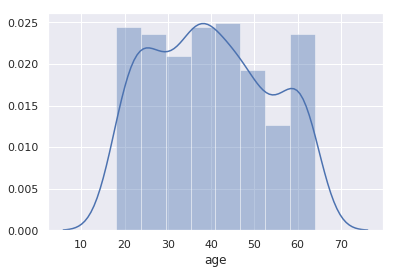

In [32]:
sns.distplot(df_train['age']);

### Diagnose date

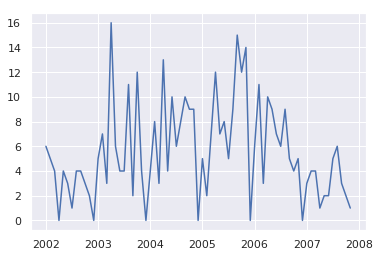

In [33]:
df_train.diagnose_date.value_counts().resample('M', how='sum').plot()

### Treatment date

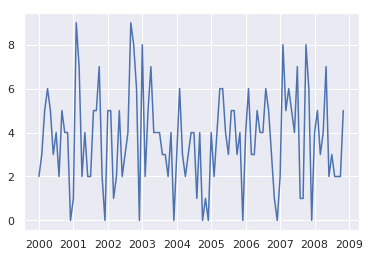

In [34]:
df_train.treatment_date.value_counts().resample('M', how='sum').plot()

## Correlation heatmap

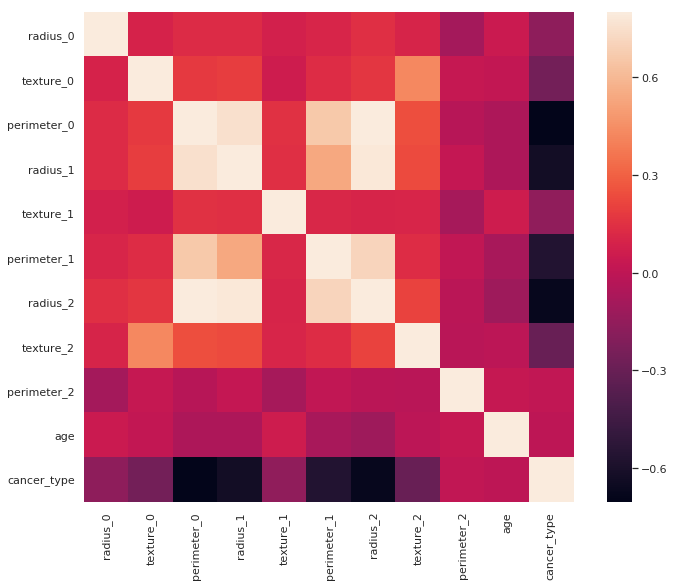

In [39]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [90]:
corrmat

,radius_0,texture_0,perimeter_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,cancer_type
radius_0,1.000000,0.090260,0.127806,0.127501,0.081339,0.102342,0.147473,0.101295,-0.088002,0.047784,-0.165618
texture_0,0.090260,1.000000,0.180504,0.193661,0.054536,0.131603,0.171654,0.426034,0.029577,0.015494,-0.262385
perimeter_0,0.127806,0.180504,1.000000,0.757468,0.151266,0.660504,0.820268,0.243558,-0.026881,-0.059903,-0.702946
radius_1,0.127501,0.193661,0.757468,1.000000,0.144733,0.536541,0.782447,0.231772,0.023045,-0.057295,-0.627930
texture_1,0.081339,0.054536,0.151266,0.144733,1.000000,0.112333,0.098114,0.104220,-0.084125,0.055063,-0.158078
perimeter_1,0.102342,0.131603,0.660504,0.536541,0.112333,1.000000,0.708781,0.136152,0.011278,-0.077562,-0.562605
radius_2,0.147473,0.171654,0.820268,0.782447,0.098114,0.708781,1.000000,0.210055,-0.013657,-0.112529,-0.675149
texture_2,0.101295,0.426034,0.243558,0.231772,0.104220,0.136152,0.210055,1.000000,-0.016251,-0.005861,-0.297993
perimeter_2,-0.088002,0.029577,-0.026881,0.023045,-0.084125,0.011278,-0.013657,-0.016251,1.000000,0.030057,0.013055
age,0.047784,0.015494,-0.059903,-0.057295,0.055063,-0.077562,-0.112529,-0.005861,0.030057,1.000000,-0.001636


* Perimeter_0 is highly correlated with perimeter_1 and radius_2
* so is radius_1 and radius_2
* our target is highly negatively correlated with perimeter_0, radius_2

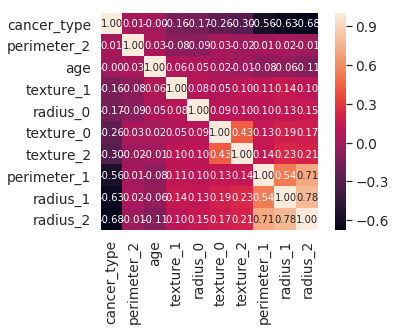

In [40]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'cancer_type')['cancer_type'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

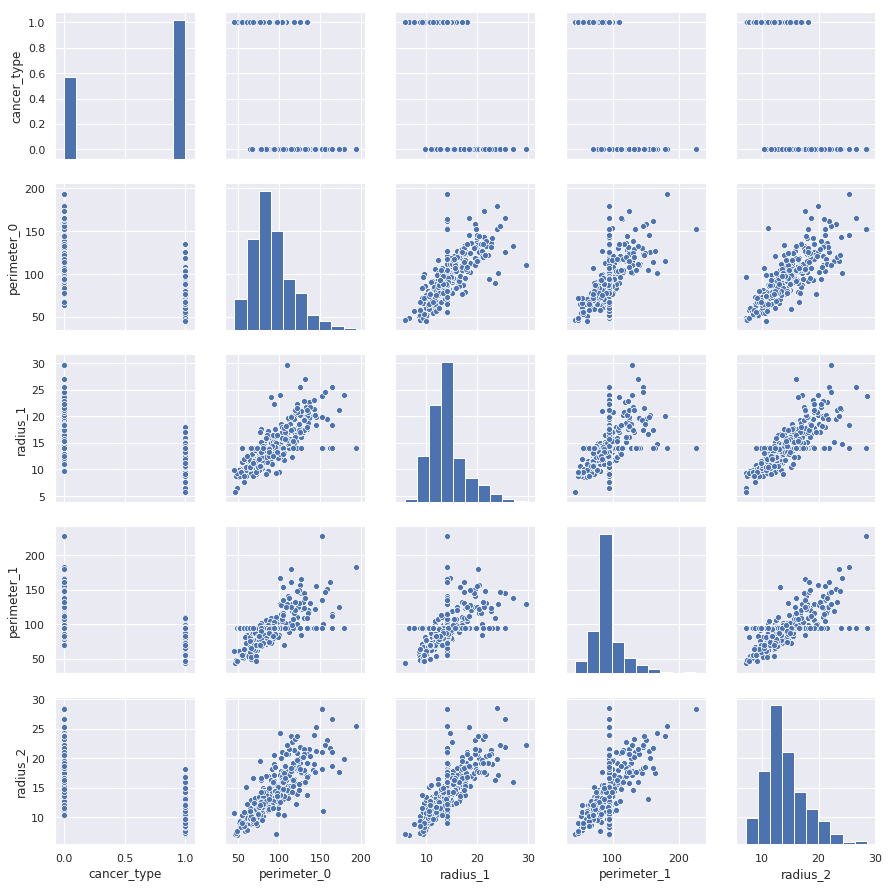

In [41]:
#scatterplot
sns.set()
cols = ['cancer_type', 'perimeter_0', 'radius_1', 'perimeter_1', 'radius_2']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [ ]:
## Feature engineering

In [92]:
import re
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [93]:
#add_datepart(df_train, 'treatment_date')
#add_datepart(df_train, 'diagnose_date')

#add_datepart(df_test, 'treatment_date')
#add_datepart(df_test, 'diagnose_date')
#df_train.T.head(20)

In [ ]:
## Feature selection

# Part 2 - Predicting cancer type

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

# Precision = TP/TP+FP
# Recall = TP/TP+FN
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [43]:
train_labels = np.array(list(df_train[df_train['cancer_type'].notnull()]['cancer_type'].astype(np.uint8)))

# Extract the training data
#cols_to_drop = []
cols_to_drop = ['treatment_date', 'diagnose_date']
target = ['cancer_type']
train_set = df_train[df_train['cancer_type'].notnull()].drop(columns = cols_to_drop).drop(columns=target)
test_set = df_test.drop(columns = cols_to_drop)

In [44]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])
#pipeline = Pipeline([ ('scaler', MinMaxScaler())])


# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

/home/schreibf/anaconda3/envs/fastaiv1py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [45]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.8928 with std = 0.0446


## Feature importance

In [46]:
model.fit(train_set, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head(20)

,feature,importance
0,radius_0,0.179278
1,texture_0,0.061562
2,perimeter_0,0.237343
3,radius_1,0.125174
4,texture_1,0.028684
5,perimeter_1,0.071099
6,radius_2,0.175727
7,texture_2,0.060568
8,perimeter_2,0.031895
9,age,0.028669


In [47]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

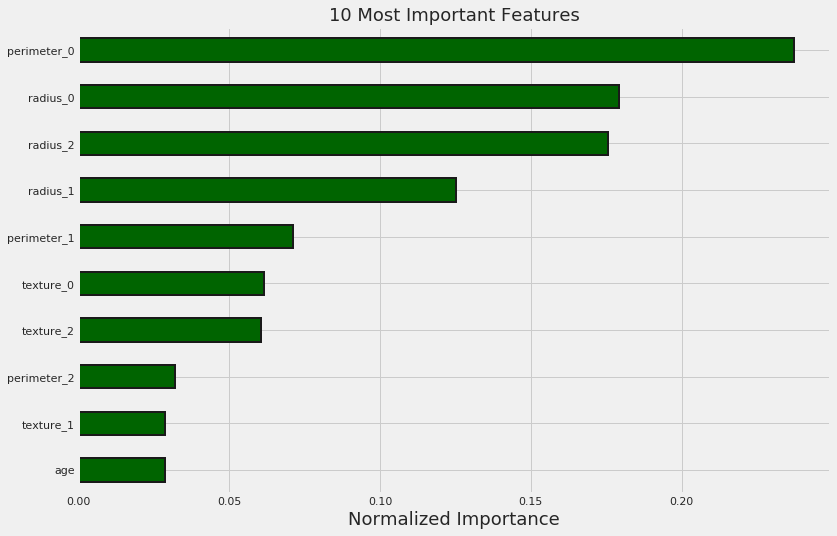

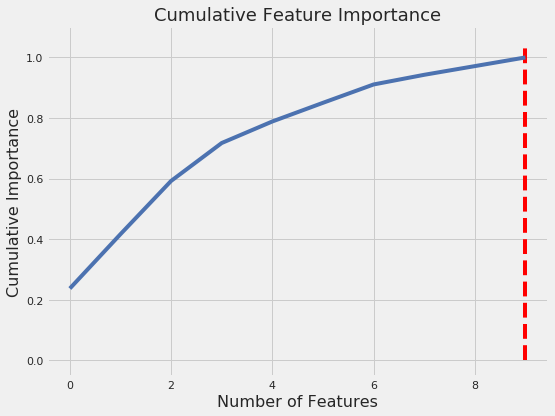

9 features required for 95% of cumulative importance.


In [48]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

## Write submission file

Note: Make sure order is the same as in test

In [49]:
predictions = model.predict(test_set)

In [95]:
submission = pd.DataFrame({'cancer_type':predictions})
print(len(submission))
print(len(df_submission))
submission.to_csv("submission_fs.csv", index=False)

171
171


In [94]:
submission.head()

,cancer_type
0,1
1,1
2,0
3,1
4,1


## Comparing different models

In [64]:
# Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [65]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [66]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 
                         'LSVC', model_results)

10 Fold CV Score: 0.86515 with std: 0.04648


In [67]:
model_results

,model,cv_mean,cv_std
0,LSVC,0.865154,0.046481


In [68]:
model_results = cv_model(train_set, train_labels, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.86002 with std: 0.0534


In [69]:
model_results = cv_model(train_set, train_labels, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.84703 with std: 0.03937


In [70]:
model_results = cv_model(train_set, train_labels, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.85895 with std: 0.05695


In [71]:
model_results = cv_model(train_set, train_labels, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.85213 with std: 0.05883


In [72]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.81475 with std: 0.0794

KNN with 10 neighbors

10 Fold CV Score: 0.86285 with std: 0.05237

KNN with 20 neighbors

10 Fold CV Score: 0.83984 with std: 0.0538


In [73]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, 
                         ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                         'EXT', model_results)

10 Fold CV Score: 0.87297 with std: 0.02988


### Comparing model performance

In [74]:
model_results = cv_model(train_set, train_labels,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.89277 with std: 0.04462


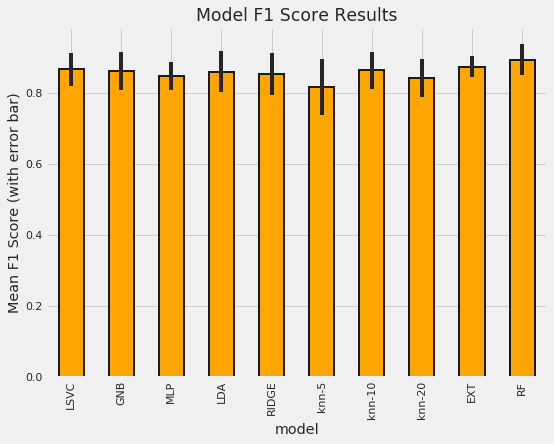

In [75]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [76]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, train_set, train_labels, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.88 (+/- 0.03) [Logistic Regression]
Accuracy: 0.90 (+/- 0.02) [Random Forest]
Accuracy: 0.88 (+/- 0.03) [Naive Bayes]


In [77]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, train_set, train_labels, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.88 (+/- 0.03) [Logistic Regression]
Accuracy: 0.90 (+/- 0.02) [Random Forest]
Accuracy: 0.88 (+/- 0.03) [Naive Bayes]
Accuracy: 0.88 (+/- 0.03) [Ensemble]


# Part 3 - Univariate analysis


  Build a regression model for predicting radius_2 based on perimeter_1
* the model should be able to quantify its prediction reliability, e.g. density estimates, etc. (please do not just use the outputted R^2 or confidence interval estimates of typical linear regression packages fitting results)
* prepare a visualization that illustrates possible prediction uncertainties

## Let's have a look at the two features

(398, 13)
(264, 2)
0.8668533509639049


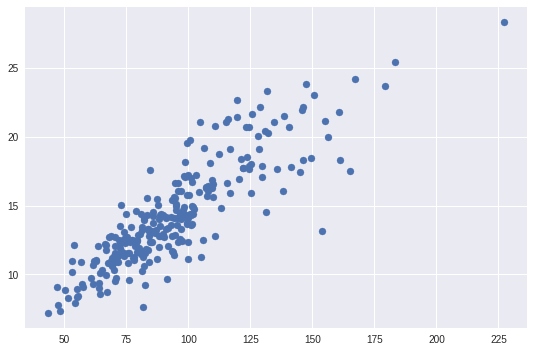

In [84]:
df_train = pd.read_csv(f'{PATH}train_data.csv', low_memory=False, 
                     parse_dates=["diagnose_date","treatment_date"], encoding = "ISO-8859-1")
print(df_train.shape)
df_reg = df_train[['perimeter_1','radius_2']].dropna()
print(df_reg.shape)
#t = sns.scatterplot(df_reg['perimeter_1'], df_reg['radius_2'])
plt.scatter(df_reg['perimeter_1'], df_reg['radius_2'], marker='o');
print(df_reg['perimeter_1'].corr(df_reg['radius_2']))

Scatterplot shows a linear relationship btw. data

source: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

In [85]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

### Define independent and dependent variable

Y' = bX + A

Y' is the predicted score, b is the slope of the line, and A is the Y intercept

In [86]:
#df_reg = df_train[[]] 
reg_target = 'radius_2'
reg_dependent = 'perimeter_1'

### Fit a linear regression model

In [87]:
model_f = reg_target+' ~ '+reg_dependent

model = smf.ols(formula=model_f, data=df_reg)
model_fit = model.fit()

### Check model stats

In [88]:
# Print out the statistics
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               radius_2   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     792.0
Date:                Fri, 19 Oct 2018   Prob (F-statistic):           3.60e-81
Time:                        06:44:55   Log-Likelihood:                -540.37
No. Observations:                 264   AIC:                             1085.
Df Residuals:                     262   BIC:                             1092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.0257      0.416      7.275      0.000       2.207       3.845
perimeter_1     0.1195      0.004     28.143      0.000       0.111       0.128
==============================================================================
Omnibus:                       13.896   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               34.877
Skew:                          -0.054   Prob(JB):                     2.67e-08
Kurtosis:                       4.777   Cond. No.                         352.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the Table —This is a very long table, isn’t it? First we have what’s the dependent variable and the model and the method. OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line (see the previous section of this post). Date and Time are pretty self-explanatory :) So as number of observations. Df of residuals and models relates to the degrees of freedom — “the number of values in the final calculation of a statistic that are free to vary.”

The coefficient of 3.634 means that as the RM variable increases by 1, the predicted value of MDEV increases by 3.634. A few other important values are the 
* R-squared — the percentage of variance our model explains; 
* the standard error (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); 
* the t scores and p-values, for hypothesis test — the RM has statistically significant p-value; 
* there is a 95% confidence intervals for the RM (meaning we predict at a 95% percent confidence that the value of RM is between 3.548 to 3.759).

In [47]:
# Calculations required for some of the plots

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

### Check model assumptions

#### Are there any trends in the data? - Residual plot

Goal: Check if variance is constant

This Scatterplot show fitted values against residuals, with a “locally weighted scatterplot smoothing (lowess)” regression line showing any apparent trend.

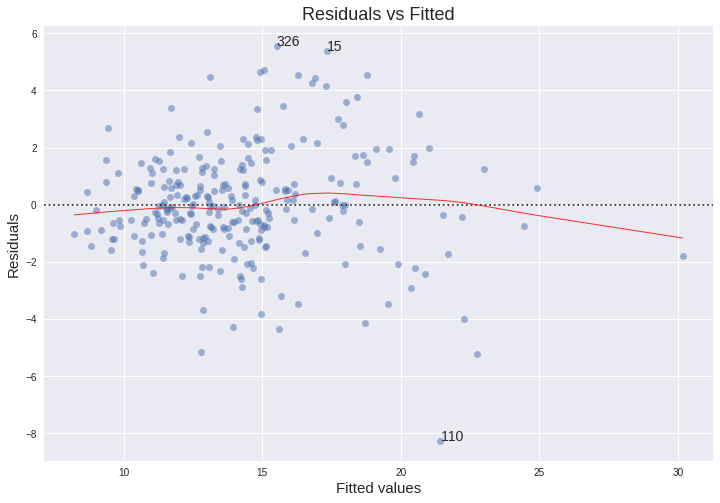

In [48]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, reg_target, data=df_reg, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

If linearity assumption is met, we shouldn't see a pattern here

* x-axis has predicted values
* y-axis has errors for each prediction. E.g. prediction was too high, then residual would be negative

**Interpretation**: Data looks like a cloud. No obvious pattern visible.

#### Is data normally distributed? - Quantile-quantile (QQ) Plot

shows how well the distribution of residuals fit the normal distribution. This plots the standardized (z-score) residuals against the theoretical normal quantiles. Anything quite off the diagonal lines may be a concern for further investigation.

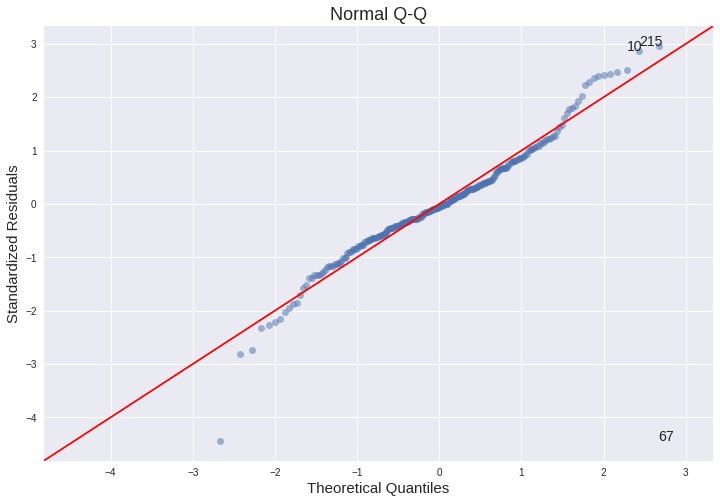

In [49]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

Compare quantiles generated from dataset (y-axis) vs quantiles generated from normal distribution

**Interpretation**: Most of the points are on the line -> normally distributed

**Next**: Could check plotting against uniform distribution

#### Scale-Location Plot

* This is another residual plot, showing their spread, which you can use to assess heteroscedasticity.

* In contrast to the residual plot, it uses the square root of the standardized residuals

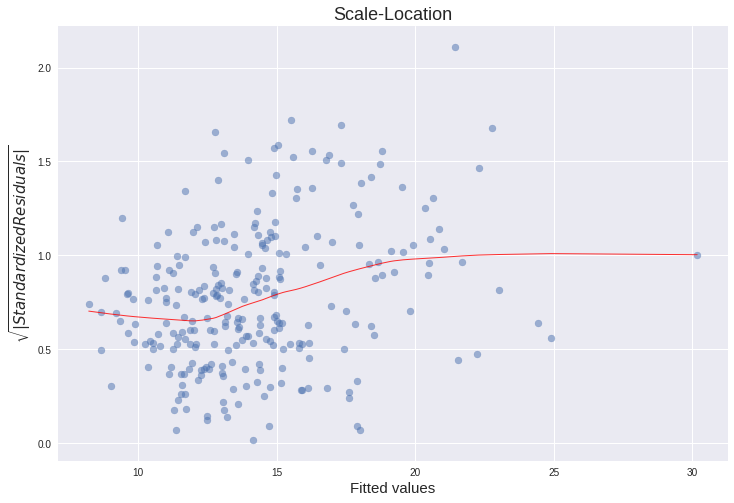

In [50]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

#for i in abs_norm_resid_top_3:
#    plot_lm_3.axes[0].annotate(i, 
#                               xy=(model_fitted_y[i], 
#                                   model_norm_residuals_abs_sqrt[i]));

#### Leverage plot

This plot shows if any outliers have influence over the regression fit. Anything outside the group and outside “Cook’s Distance” lines, may have an influential effect on model fit.

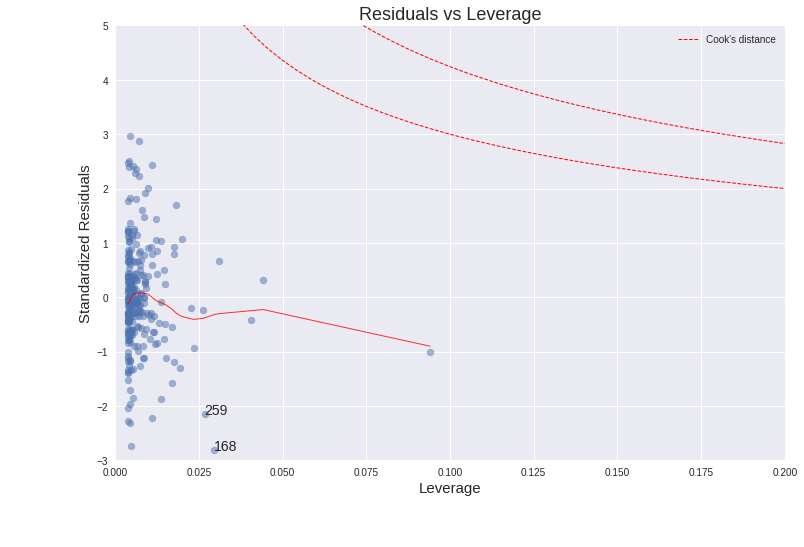

In [51]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

**Interpretation**: It looks like there are some outliers whose presence has a big effect on the regression fit.

**Next**: Check if data is recorded correctly and - if yes - discard data points. 

# Backup

In [ ]:
Things to do

More data
Feature engineering
Model ensembl

In [ ]:
(X,y) = (df_reg['perimeter_1'].values, df_reg['radius_2'].values)
X = np.reshape(X, (-1, 2))
y = np.reshape(y, (-1, 2))

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
X_train = X[:-40]
X_test = X[-40:]

# Split the targets into training/testing sets
y_train = y[:-40]
y_test = y[-40:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()